### 

# Placement Predictor using Machine Learning

## Importing required Libraries 

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Feeding the Input in the form of the dataset

In [4]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## From the above dataset The following fields which we are taking as an input are mentioned below 

##### gender         -> gender                                                    --> Male or Female
##### ssc_p          -> Secondary School Education Percentage [10th grade]        --> 0% to 100% 
##### ssc_b          -> Secondary School Board of Education [10th grade]          --> Central or Other 
##### hsc_p          -> Higher Secondary School Education Percentage [12th grade] --> 0% to 100%
##### hsc_b          -> Higher Secondary School Board of Education [12th grade]   --> Central or Other
##### hcs_s          -> Specialization in Higher Secondary Education              --> Commerce, Science , Arts etc.
##### degree_p       -> Degree percentage                                         --> 0% to 100%
##### degree_t       -> Under Graduate Degree type                                --> Comms&Mgmt, Sci&Tech, Pharma etc.
##### workex         -> Work Experience                                           --> Yes or No
##### etest_p        -> Employbility Test Percentage                              --> 0% to 100%
##### specialization -> Post Graduation Specialization                            --> MBA
##### mba_p          -> MBA Percentation                                          --> 0% to 100%
##### status         -> placement Status                                          --> Placed or Not Placed
##### salary         -> Salary                                                    --> LPA

# Check code for finding the null records

In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### we have got 67 null values in the "salary" attribute  (because those 67 students were not placed)

### setting empty fields to 0

In [6]:
df['salary']=df['salary'].fillna(df['salary'].mode()[0])
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Degree Comparison 

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

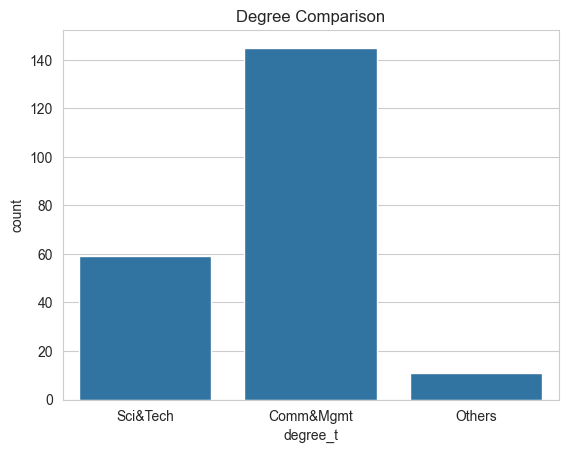

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'degree_t', data = df)
plt.title('Degree Comparison')
df['degree_t'].value_counts()

## Number of students got placed amongst gender

Text(0.5, 1.0, 'No of students placed amongst gender')

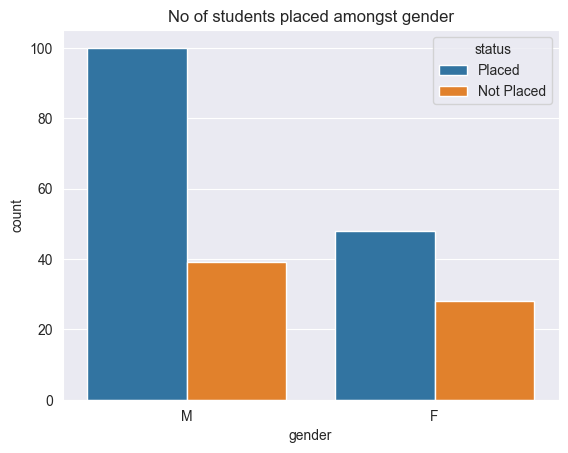

In [8]:
sns.set_style('darkgrid')
sns.countplot(x = 'gender', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

## Number of students got placed amongst gender and with their respective specialization

Text(0.5, 1.0, 'No of students placed amongst gender')

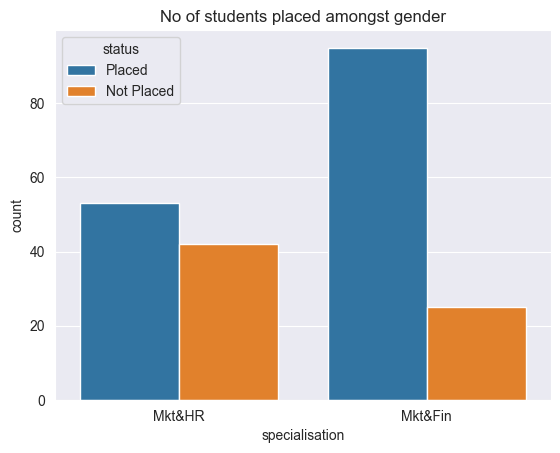

In [10]:
sns.set_style('darkgrid')
sns.countplot(x = 'specialisation', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

## Placement Status

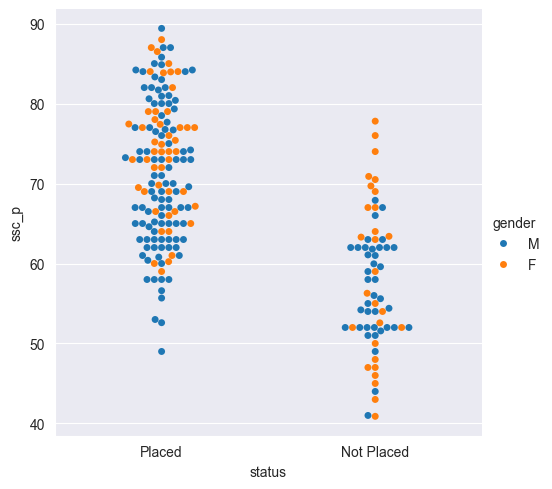

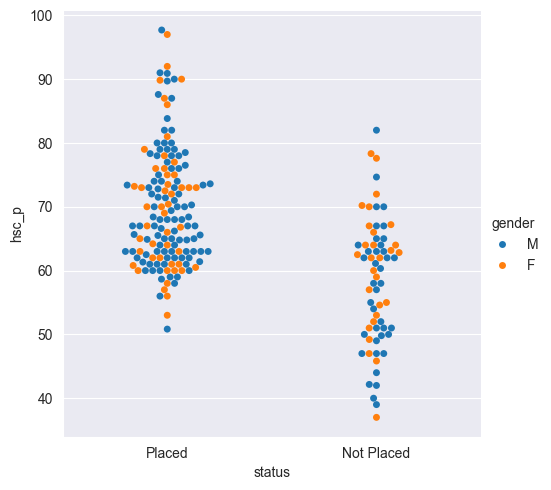

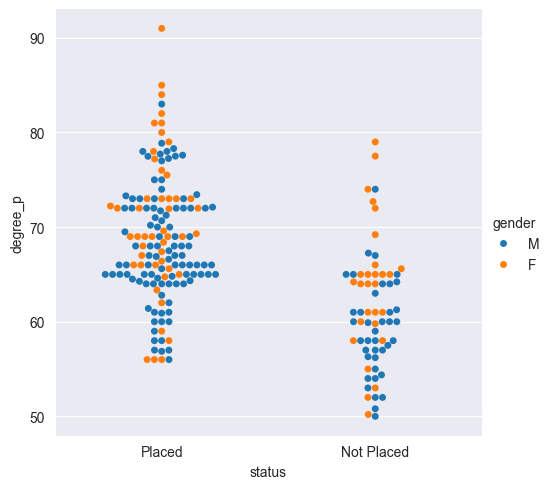

In [11]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",hue='gender')

## Placement Status based upon the Work experience

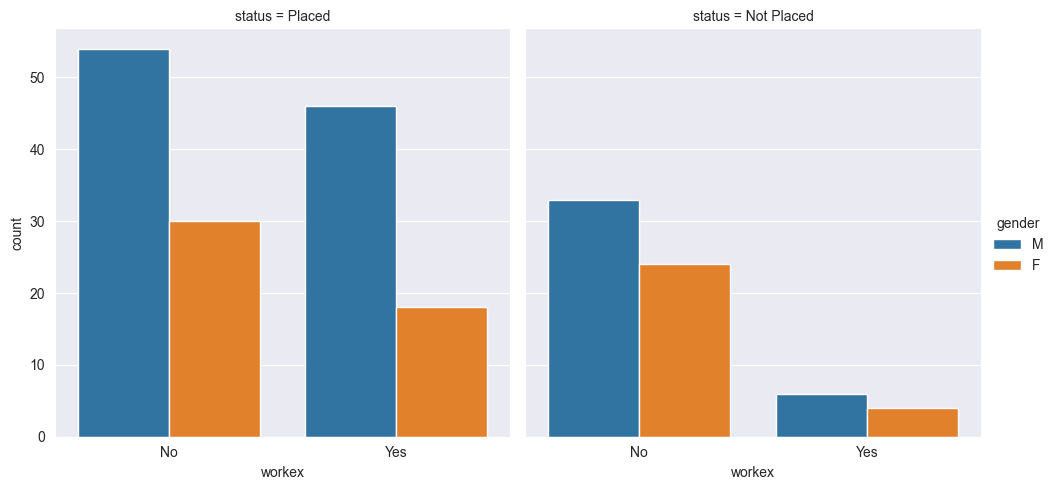

In [13]:
sns.catplot(x="workex", kind="count",hue ='gender', data=df, col='status');

# Data visulization for Salary distribution

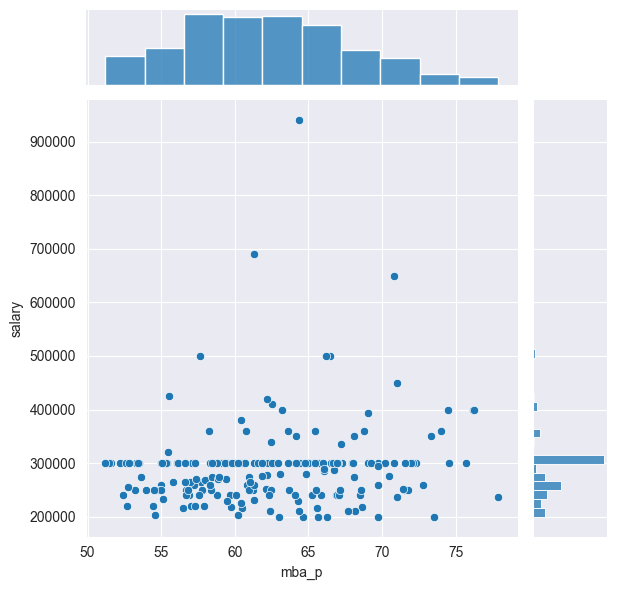

In [14]:
sns.jointplot(x=df['mba_p'], y=df['salary']);

# changing the Values in the Record 

## 1. Replacing the gender values --> Male=M Female=F
## 2. Replacing the education board values (10th and 12th) --> Central=1 Other=0
## 3. Replacing the Higher Secondary Education Specialization  values --> Science=1 Commerce=2 Arts=3
## 4. Replacing the workex Values --> YES=1 NO=0
## 5. Under Graduate Degree Type Values --> "MktFin"=1 "MktHR"=0

In [15]:
df['gender'].replace(to_replace='M', value=1, inplace=True)
df['gender'].replace(to_replace='F', value=0, inplace=True)

df['ssc_b'].replace(to_replace='Central', value=1, inplace=True)
df['ssc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_b'].replace(to_replace='Central', value=1, inplace=True)
df['hsc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_s'].replace(to_replace='Science', value=1, inplace=True)
df['hsc_s'].replace(to_replace='Commerce', value=2, inplace=True)
df['hsc_s'].replace(to_replace='Arts', value=3, inplace=True)

df['workex'].replace(to_replace='Yes', value=1, inplace=True)
df['workex'].replace(to_replace='No', value=0, inplace=True)

df['specialisation'].replace(to_replace='Mkt&Fin', value=1, inplace=True)
df['specialisation'].replace(to_replace='Mkt&HR', value=0, inplace=True)

C:\Users\DevUser\AppData\Local\Temp\ipykernel_21208\2598845899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(to_replace='M', value=1, inplace=True)
C:\Users\DevUser\AppData\Local\Temp\ipykernel_21208\2598845899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [16]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,2,58.00,Sci&Tech,0,55.0,0,58.80,Placed,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,Sci&Tech,1,86.5,1,66.28,Placed,200000.0
2,3,1,65.00,1,68.00,1,3,64.00,Comm&Mgmt,0,75.0,1,57.80,Placed,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,Sci&Tech,0,66.0,0,59.43,Not Placed,300000.0
4,5,1,85.80,1,73.60,1,2,73.30,Comm&Mgmt,0,96.8,1,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,0,82.00,0,2,77.60,Comm&Mgmt,0,91.0,1,74.49,Placed,400000.0
211,212,1,58.00,0,60.00,0,1,72.00,Sci&Tech,0,74.0,1,53.62,Placed,275000.0
212,213,1,67.00,0,67.00,0,2,73.00,Comm&Mgmt,1,59.0,1,69.72,Placed,295000.0
213,214,0,74.00,0,66.00,0,2,58.00,Comm&Mgmt,0,70.0,0,60.23,Placed,204000.0


In [17]:
df.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [18]:
df['degree_t'].replace(to_replace='Sci&Tech', value=1, inplace=True)
df['degree_t'].replace(to_replace='Comm&Mgmt', value=2, inplace=True)
df['degree_t'].replace(to_replace='Others', value=2, inplace=True)

df['status'].replace(to_replace='Placed', value=1, inplace=True)
df['status'].replace(to_replace='Not Placed', value=0, inplace=True)

df.drop(['sl_no'],axis=1,inplace=True)
df.drop(['salary'],axis=1,inplace=True)

C:\Users\DevUser\AppData\Local\Temp\ipykernel_21208\2997064879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['degree_t'].replace(to_replace='Sci&Tech', value=1, inplace=True)
C:\Users\DevUser\AppData\Local\Temp\ipykernel_21208\2997064879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

# generated cleaned data

In [19]:
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,0,55.00,0,58.80,1
1,1,79.33,1,78.33,0,1,77.48,1,1,86.50,1,66.28,1
2,1,65.00,1,68.00,1,3,64.00,2,0,75.00,1,57.80,1
3,1,56.00,1,52.00,1,1,52.00,1,0,66.00,0,59.43,0
4,1,85.80,1,73.60,1,2,73.30,2,0,96.80,1,55.50,1
5,1,55.00,0,49.80,0,1,67.25,1,1,55.00,1,51.58,0
6,0,46.00,0,49.20,0,2,79.00,2,0,74.28,1,53.29,0
7,1,82.00,1,64.00,1,1,66.00,1,1,67.00,1,62.14,1
8,1,73.00,1,79.00,1,2,72.00,2,0,91.34,1,61.29,1
9,1,58.00,1,70.00,1,2,61.00,2,0,54.00,1,52.21,0


# Datatypes of the attributes in the dataframe

In [20]:
df.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
dtype: object

# Setting the X,Y axis for plotting the graph l


In [21]:
X = df[['gender', 'ssc_p','ssc_b', 'hsc_p','hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

# Splitting of the data into training and test sets
## 70% training 30% test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the data using Decision Trees, Random Forest ,XGBoost ,Gaussian Naive - Bayes 

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# decision trees

In [25]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Predicting the accuracy of the model 

In [26]:
pred1=dt.predict(X_test)
accuracy_score(pred1,y_test)

0.8153846153846154

Generating the Confusion Matrix

In [27]:
confusion_matrix(pred1,y_test)

array([[15,  6],
       [ 6, 38]], dtype=int64)

# Random Forest 

In [28]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

## Predicting the accuracy for the model

In [29]:
pred2=rf.predict(X_test)
accuracy_score(pred2,y_test)

0.8

Generating the Confusion Matrix

In [30]:
confusion_matrix(pred2,y_test)

array([[10,  2],
       [11, 42]], dtype=int64)

# XGBOOST

In [32]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Predicting the Accuracy of the model

In [33]:
pred3=xgb.predict(X_test)
accuracy_score(pred3,y_test)

0.8153846153846154

Generating the confusi matrix

In [34]:
confusion_matrix(pred3,y_test)

array([[12,  3],
       [ 9, 41]], dtype=int64)

# Naive bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

## Predicting the accuracy of the model

In [38]:
pred4=nb_model.predict(X_test)
accuracy_score(pred4,y_test)

0.8

Generating Confusion matrix


In [39]:
confusion_matrix(pred4,y_test)

array([[12,  4],
       [ 9, 40]], dtype=int64)